In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from wordcloud import WordCloud, STOPWORDS

from nltk.tokenize import word_tokenize, sent_tokenize, wordpunct_tokenize, TreebankWordTokenizer, TweetTokenizer, MWETokenizer
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer



In [2]:
"""**Importing CSV files**"""

train_df=pd.read_csv("C:/Users/VATSALA NEMA/Documents/SEM 7/NLP 2022/Project- Sarcasm detection in Soc med/Dataset/project1/project_training_data_with_class_labels.csv" , error_bad_lines=False) 
test_df = pd.read_csv("C:/Users/VATSALA NEMA/Documents/SEM 7/NLP 2022/Project- Sarcasm detection in Soc med/Dataset/project1/project_test_data.csv", error_bad_lines=False)

C:\Users\VATSALA NEMA\AppData\Local\Temp\ipykernel_25752\2134935217.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train_df=pd.read_csv("C:/Users/VATSALA NEMA/Documents/SEM 7/NLP 2022/Project- Sarcasm detection in Soc med/Dataset/project1/project_training_data_with_class_labels.csv" , error_bad_lines=False)
C:\Users\VATSALA NEMA\AppData\Local\Temp\ipykernel_25752\2134935217.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  test_df = pd.read_csv("C:/Users/VATSALA NEMA/Documents/SEM 7/NLP 2022/Project- Sarcasm detection in Soc med/Dataset/project1/project_test_data.csv", error_bad_lines=False)
b'Skipping line 52657: expected 3 fields, saw 4\nSkipping line 57683: expected 3 fields, saw 4\n'


In [3]:


df1 = train_df[train_df.isna().any(axis=1)]

df1

train_df.dropna()

df2 = test_df[test_df.isna().any(axis=1)]

df2

test_df.dropna()

train_df.rename(columns = {' Class Labels ':'label'}, inplace = True)

train_df['label'].replace(['non-sarcastic','sarcastic'],[1,0], inplace = True)

train_df.head()

train_df.info()

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808103 entries, 0 to 808102
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               808101 non-null  object
 1   Comments         808062 non-null  object
 2   Parent Comments  808099 non-null  object
 3   label            808080 non-null  object
 4   Unnamed: 4       10 non-null      object
dtypes: object(5)
memory usage: 30.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202062 entries, 0 to 202061
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ID                202062 non-null  object
 1   Comments          202047 non-null  object
 2   Parent Comments   202060 non-null  object
dtypes: object(3)
memory usage: 4.6+ MB


0                                                                                                                                                                                                                                                                                                                                                                                                                                         0.500001
1                                                                                                                                                                                                                                                                                                                                                                                                                                         0.499959
Chaining help So i was dexnav chaining for a ralts on r102 and then i got the thing "cannot be found in the area or whatever" so t

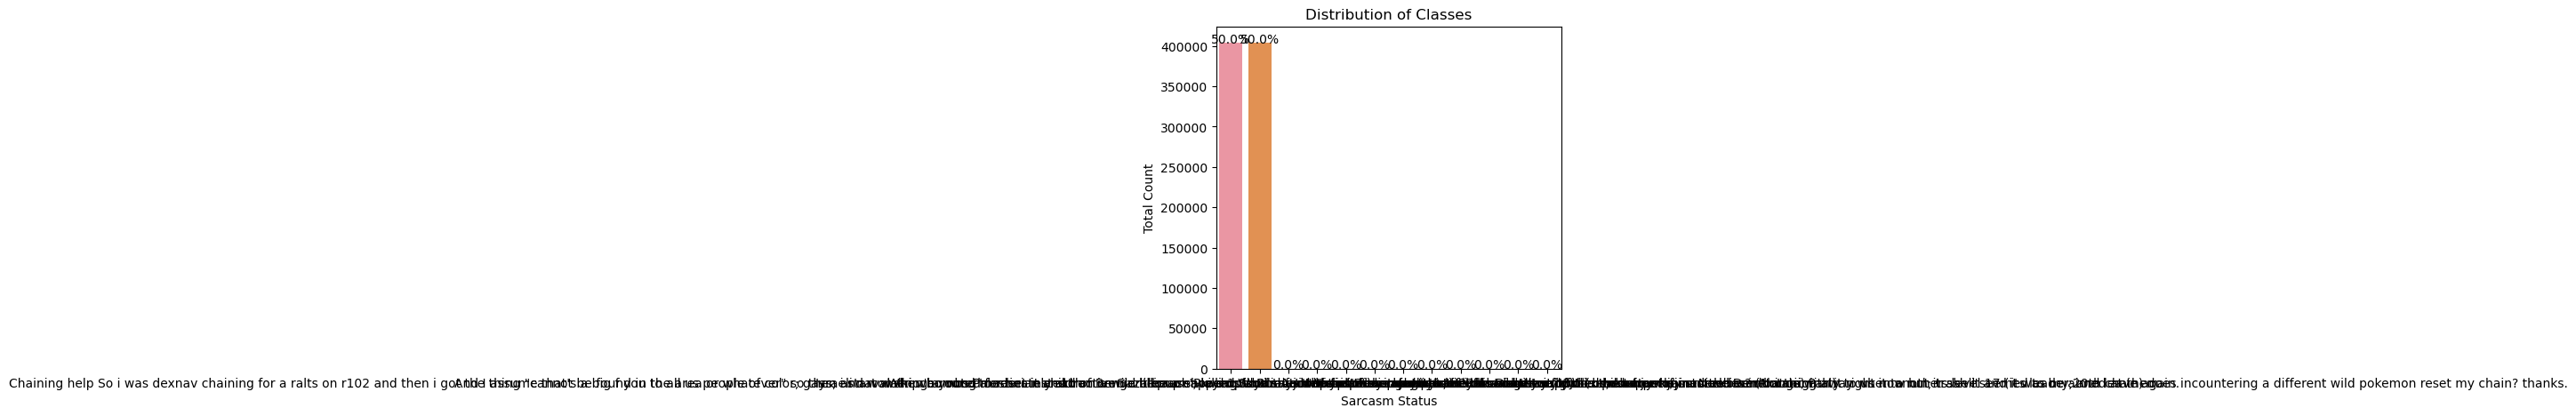

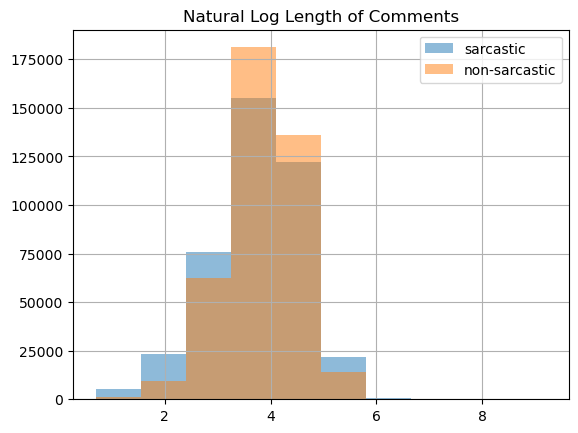

"Sarcastic comments are normally distributed in length. Non-sarcastic comments has a right-skew.\n\n# Most common words in the sarcastic comments \nwordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,\n                max_words = 200, max_font_size = 100, \n                random_state = 17, width=800, height=400)\n\nplt.figure(figsize=(12, 12))\nwordcloud.generate(str(train_df.loc[train_df['label'] == 1, 'Parent Comments']))\nplt.grid(b= False)\nplt.imshow(wordcloud);"

In [4]:
"""**Exploratory Data Analysis**"""

# to check number of sarcastic and non-sarcastic comments
train_df['label'].value_counts()

"""Almost equal number of sarcastic and non-sarcastic comments."""

print(train_df['label'].value_counts()/len(train_df))

plt.figure(figsize=(5,5))
ax = sns.countplot(x='label',  data= train_df)
ax.set(title = "Distribution of Classes", xlabel="Sarcasm Status", ylabel = "Total Count")
total = float(len(train_df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center") 
plt.show()

# To check if there is any relation between the length of the comment and its label
#train_df.loc[train_df,'Comments'].str.len().apply(np.log1p).hist(label='sarcastic,alpha=.5)
train_df.loc[train_df['label']==1,'Comments'].str.len().apply(np.log1p).hist(label='sarcastic', alpha=.5)
train_df.loc[train_df['label']==0,'Comments'].str.len().apply(np.log1p).hist(label='non-sarcastic', alpha=.5)
plt.legend()
plt.title('Natural Log Length of Comments')
plt.show()

"""Sarcastic comments are normally distributed in length. Non-sarcastic comments has a right-skew.

# Most common words in the sarcastic comments 
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(12, 12))
wordcloud.generate(str(train_df.loc[train_df['label'] == 1, 'Parent Comments']))
plt.grid(b= False)
plt.imshow(wordcloud);"""



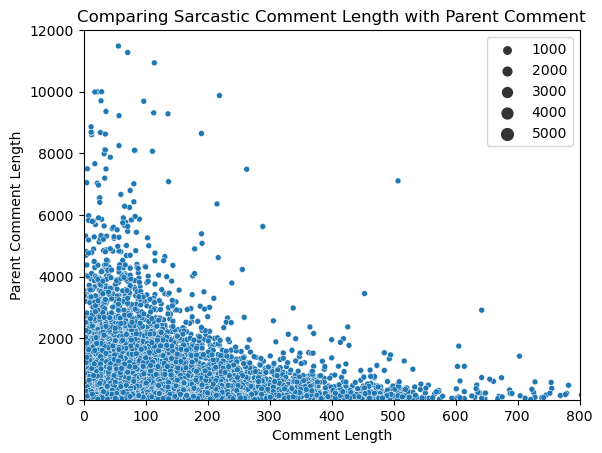

0                                          Central Illinois
1         To think - CNN used to be the acronym synonymo...
2         But then again; you have to consider that all ...
3                                                   ughhhhh
4                                       I should've put the
                                ...                        
808098    50% hp/def elgif; impiety orb; bourn jewel che...
808099                                       Rubicon Mango.
808100                     Essentially GAP insurance right?
808101    Yeah; but sometimes that weird kid keeps tryin...
808102    Petroleum doesn't really require a terroir lik...
Name: Comments, Length: 808103, dtype: object

In [5]:
# Comparing sarcastic comments with Parent comments
sarcasm_comm_len = np.array(train_df.loc[train_df['label'] == 1]['Comments'].str.len())
parent_comm_len = np.array(train_df.loc[train_df['label'] == 1]['Parent Comments'].str.len())
ratio_len = np.array((train_df.loc[train_df['label'] == 1]['Comments'].str.len())/(train_df.loc[train_df['label'] == 1]['Parent Comments'].str.len()))

d = pd.DataFrame({'Comment Length': sarcasm_comm_len, 'Parent Comment Length': parent_comm_len, 'Ratio Length': ratio_len}, columns=['Comment Length', 'Parent Comment Length', 'Ratio Length'])

ax = plt.axes()
sns.scatterplot(data=d, x="Comment Length", y="Parent Comment Length",  size=ratio_len)
ax.set_title("Comparing Sarcastic Comment Length with Parent Comment")
# control x and y limits
plt.ylim(0, 12000)
plt.xlim(0, 800)
plt.show()



In [20]:
# Data Pre-Processing
# Removing the null comments
train_df.dropna(subset=['Comments'], inplace=True)
train_df['Comments'] = train_df['Comments'].str.lower()
train_df['Comments'] = train_df['Comments'].str.replace('[^\w\s]','')

corpus = train_df['Comments'].astype(str)

corpus

C:\Users\VATSALA NEMA\AppData\Local\Temp\ipykernel_25752\3681565330.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['Comments'] = train_df['Comments'].str.replace('[^\w\s]','')


0                                          central illinois
1         to think  cnn used to be the acronym synonymou...
2         but then again you have to consider that all h...
3                                                   ughhhhh
4                                        i shouldve put the
                                ...                        
808098    50 hpdef elgif impiety orb bourn jewel checkin...
808099                                        rubicon mango
808100                      essentially gap insurance right
808101    yeah but sometimes that weird kid keeps trying...
808102    petroleum doesnt really require a terroir like...
Name: Comments, Length: 808062, dtype: object

In [ ]:
#Feature Engineering



In [21]:
"""Tfidf vectorizer

Stop words removed
"""

method="Binary"

from sklearn.feature_extraction.text import CountVectorizer

if method=="Tfidf":
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
elif method=="Binary":
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=2)
    
tfidf= TfidfVectorizer(stop_words='english', ngram_range=(1,1))

X = vectorizer.fit_transform(corpus)
np.shape(X)

(808062, 385796)

In [22]:
#print(vectorizer.get_feature_names())
X=np.asmatrix(X)
Countvecs=pd.DataFrame(X)

print(Countvecs.head())

                                                   0
0    (0, 49197)\t1\n  (0, 155205)\t1\n  (0, 49213...


In [9]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),token_pattern=r'\b\w+\b', min_df=1).build_analyzer()

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_df['Comments'], train_df['label'], test_size= 0.25, random_state=42)

In [25]:

from os import path
sns.set()
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import calendar
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline
import time

In [27]:
parameters = {'solver': [ 'lbfgs', 'liblinear', 'saga'], 'verbose': [0, 1, 2]}

# multinomial logistic regression a.k.a softmax classifier
logit = LogisticRegression(random_state= 42)

logit_classifier = GridSearchCV(logit, parameters, cv = 5, n_jobs= 4)

# sklearn's pipeline
tfidf_logit_pipeline = Pipeline([('vectorizer', vectorizer),  ('logit_classifier', logit_classifier)])

In [28]:
start = time.time()
tfidf_logit_pipeline.fit(x_train, y_train)
end = time.time()
print(end - start) 

ValueError: 
All the 45 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Apps\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Apps\Conda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1138, in fit
    X, y = self._validate_data(
  File "C:\Apps\Conda\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Apps\Conda\lib\site-packages\sklearn\utils\validation.py", line 1090, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
  File "C:\Apps\Conda\lib\site-packages\sklearn\utils\validation.py", line 1112, in _check_y
    _assert_all_finite(y, input_name="y", estimator_name=estimator_name)
  File "C:\Apps\Conda\lib\site-packages\sklearn\utils\validation.py", line 151, in _assert_all_finite
    raise ValueError("Input contains NaN")
ValueError: Input contains NaN


In [ ]:
print(logit_classifier.best_params_)
print(logit_classifier.best_score_)

In [ ]:
valid_pred = tfidf_logit_pipeline.predict(x_test)

In [ ]:
accuracy_score(y_test, valid_pred)

In [ ]:
# Getting the accuracy metric
acc = accuracy_score(valid_pred, y_test)
pre = precision_score(valid_pred, y_test)
rec = recall_score(valid_pred, y_test)
f1 = f1_score(valid_pred, y_test)

print ('Model Performance Statistic Suite-1: ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)

cm = confusion_matrix(y_test,valid_pred)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

In [ ]:
cm =  pd.DataFrame(cm, index=['Natural','Sarcastic'],columns=['Natural','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Ground Truth',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)